Enter the path to the image: /content/images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1. Doberman: 99.89%
2. miniature_pinscher: 0.04%
3. Gordon_setter: 0.04%


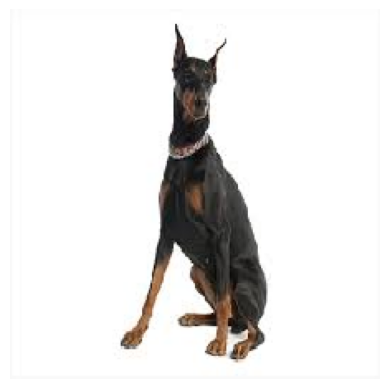

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Ask user for image path
img_path = input("Enter the path to the image: ")

# Load and preprocess the image
try:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make predictions
    preds = model.predict(x)

    # Decode and print the top-3 predicted classes
    decoded_preds = decode_predictions(preds, top=3)[0]
    for i, (imagenet_id, label, score) in enumerate(decoded_preds):
        print("{}. {}: {:.2f}%".format(i+1, label, score * 100))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print("Image not found. Please check the path and try again.")
